In [1]:
import pandas as pd 
import pandas_datareader as web

c:\users\ricardo correia\appdata\local\programs\python\python37\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [20]:
df = web.get_data_yahoo("MSFT",start = "2020-03-09",end = "2020-09-09")[["Close"]]

In [21]:
df

,Close
Date,
2020-03-09,150.619995
2020-03-10,160.919998
2020-03-11,153.630005
2020-03-12,139.059998
2020-03-13,158.830002
...,...
2020-09-02,231.649994
2020-09-03,217.300003
2020-09-04,214.250000


In [23]:
df.to_excel("Predict Prices with MA.xlsx")

In [31]:
df = web.get_data_yahoo("AMZN",start = "2020-03-08",end = "2020-09-08")

In [32]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-09,1862.770020,1761.290039,1773.859985,1800.609985,7813200,1800.609985
2020-03-10,1894.270020,1818.170044,1870.880005,1891.819946,7133300,1891.819946
2020-03-11,1871.319946,1801.500000,1857.849976,1820.859985,5624800,1820.859985
2020-03-12,1765.000000,1675.000000,1721.979980,1676.609985,11346200,1676.609985
2020-03-13,1786.310059,1680.619995,1755.000000,1785.000000,8809700,1785.000000


In [35]:
df[["Close"]].to_excel("Linear Regression on stocks.xlsx")

In [36]:
df = web.get_data_yahoo("DIS","2010-01-01","2020-09-01")

In [37]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,32.750000,31.870001,32.50,32.070000,13700400.0,27.933924
2010-01-05,32.160000,31.700001,32.07,31.990000,10307700.0,27.864237
2010-01-06,32.000000,31.680000,31.90,31.820000,10709500.0,27.716166
2010-01-07,31.860001,31.540001,31.77,31.830000,8202100.0,27.724878
2010-01-08,31.940001,31.530001,31.66,31.879999,7657500.0,27.768419


In [38]:
df = df[["Close"]]

In [46]:
import matplotlib.pyplot as plt 
%matplotlib inline

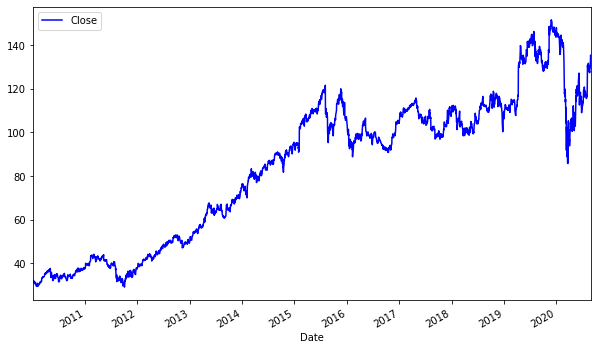

In [49]:
df.plot(figsize=(10,6),color = "b")

In [50]:
df["five_day_ma"] = df["Close"].rolling(window = 5).mean()

In [52]:
df["twenty_days_ma"] = df["Close"].rolling(window = 20).mean()

In [54]:
df["value_next_day"] = df["Close"].shift(-1)

In [ ]:
df.dropna(inplace=True)

In [60]:
x = df[["five_day_ma","twenty_days_ma"]]

In [61]:
y = df["value_next_day"]

In [62]:
df

,Close,five_day_ma,twenty_days_ma,value_next_day
Date,,,,
2010-02-01,29.520000,29.480000,30.739500,29.980000
2010-02-02,29.980000,29.544000,30.635000,30.750000
2010-02-03,30.750000,29.830000,30.573000,29.670000
2010-02-04,29.670000,29.894000,30.465500,29.540001
2010-02-05,29.540001,29.892000,30.351000,29.480000
...,...,...,...,...
2020-08-25,129.789993,128.761998,126.243499,132.179993
2020-08-26,132.179993,129.643997,127.071999,133.729996
2020-08-27,133.729996,130.765997,127.975499,135.539993


In [64]:
split_index = 0.8

In [65]:
split_index = split_index * len(df)

In [67]:
split_index = int(split_index)

In [68]:
x_train = x[:split_index]

In [70]:
y_train = y[:split_index]

In [71]:
x_test = x[split_index:]

In [72]:
y_test = y[split_index:]

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
model = LinearRegression()

In [75]:
model = model.fit(x_train,y_train)

In [79]:
five_day_ma = model.coef_[0]

In [80]:
twenty_day_ma = model.coef_[1]

In [81]:
constant = model.intercept_

In [83]:
test_output = model.predict(x_test)

In [87]:
test_output = pd.DataFrame(test_output,index=y_test.index,columns=["value"])

Text(0, 0.5, 'Disney Stock Value')

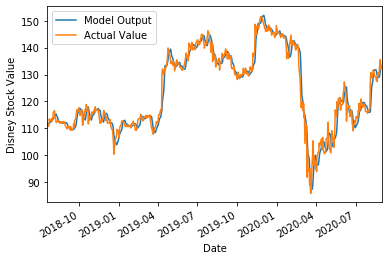

In [92]:
test_output.plot()
y_test.plot()
plt.legend(["Model Output","Actual Value"])
plt.ylabel("Disney Stock Value")

In [93]:
model.score(x[split_index:],y[split_index:])

0.9489880913533504

In [94]:
stock = pd.DataFrame()

In [95]:
stock["value"] = df[split_index:]["Close"]

In [96]:
stock["model predicted price"] = test_output

In [97]:
stock["actual stock value"] = y_test

In [99]:
stock["returns"] = stock["value"].pct_change().shift(-1)

In [102]:
import numpy as np

In [104]:
stock["strategy"] = np.where(stock["model predicted price"].shift(1) < stock["model predicted price"],1,0)

In [105]:
stock["strategy_returns"] = stock["strategy"] * stock["returns"]

In [108]:
cum_prod = (stock["strategy_returns"] + 1).cumprod()

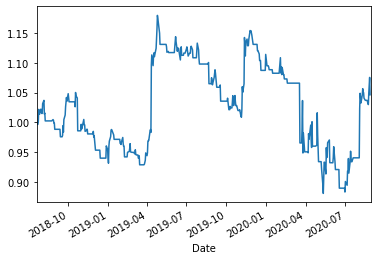

In [109]:
cum_prod.plot()